In [1]:
# Gerekli Kütüphane ve Fonksiyonlar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action="ignore")
import missingno as msno
from datetime import date
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

ModuleNotFoundError: No module named 'missingno'

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
df = pd.read_csv("/content/Yatırımcı Anketi.csv")
df.head()

,Zaman damgası,Yaşınız?,Cinsiyetiniz?,Öğrenci misiniz?,Çalışıyor musunuz?,Yatırımda hangi zaman dilimine odaklanıyorsunuz?,Yatırımlarınızı nasıl değerlendiriyorsunuz?,Borsaya yatırım yaptınız mı?,Borsa ile ilgili bilgi seviyenizi nasıl tanımlarsınız?,Paranızı yönetirken nasıl hareket edersiniz?,"Bir tanıdığınızdan yatırım ""tüyosu"" aldığınızda ne yaparsınız?",Piyasalar dalgalı olduğunda ne yaparsınız?,Yatırımlarınızda almak istediğiniz risk seviyesi ve getiri beklentinizi şıklardan hangisi en iyi şekilde açıklar?,"Son olarak, geçmişte yaptığınız bir yatırımdan sizin için önemli büyüklükte para kaybetseniz ve bugün aynı yatırımın getirisinin yüksek olması beklenseydi ne yapardınız?"
0,2024/10/24 5:22:30 ÖS GMT+3,21,Erkek,Evet,Hayır,Uzun vadeli (5 yıl ve üzeri),Borsa,Evet,Çok iyi,Araştırarak temkinli ilerlerim.,İyice araştırmadan karar vermem.,Gidişata göre karar veririm.,Uzun vadede getirim için riskli ürünlere yatır...,Yatırımı yapardım.
1,2024/10/25 10:15:00 ÖS GMT+3,20,Kadın,Evet,Hayır,Orta vadeli (1-5 yıl),Altın,Hayır,Az,Araştırarak temkinli ilerlerim.,İyice araştırmadan karar vermem.,Gidişata göre karar veririm.,Uzun vadede getirim için riskli ürünlere yatır...,Yatırımı yapardım.
2,2024/10/26 7:42:46 ÖS GMT+3,20,Kadın,Evet,Hayır,Kısa vadeli(1 yıla kadar),Döviz,Hayır,Az,Mevcut varlığımın azalmasını istemem.,İyice araştırmadan karar vermem.,Gidişata göre karar veririm.,"Riskten kaçınır, makul getiri sağlamayı tercih...",Yatırımı yapmazdım.
3,2024/10/27 8:50:04 ÖS GMT+3,20,Kadın,Evet,Hayır,Orta vadeli (1-5 yıl),Altın,Hayır,Az,Araştırarak temkinli ilerlerim.,İyice araştırmadan karar vermem.,Gidişata göre karar veririm.,Mevduat faizi üzerinde getiri beklentisiyle dü...,Yatırımı yapardım.
4,2024/10/27 10:17:35 ÖS GMT+3,18,Kadın,Evet,Hayır,Orta vadeli (1-5 yıl),Döviz,Hayır,Orta,Aktif alım satım severim.,İyice araştırmadan karar vermem.,Gidişata göre karar veririm.,"Riskten kaçınır, makul getiri sağlamayı tercih...",Yatırımı yapmazdım.


In [ ]:
df = df.drop(df.columns[0], axis=1)

In [ ]:
df.columns = [col.upper() for col in df.columns]
df.head()

,YAŞINIZ?,CINSIYETINIZ?,ÖĞRENCI MISINIZ?,ÇALIŞIYOR MUSUNUZ?,YATIRIMDA HANGI ZAMAN DILIMINE ODAKLANIYORSUNUZ?,YATIRIMLARINIZI NASIL DEĞERLENDIRIYORSUNUZ?,BORSAYA YATIRIM YAPTINIZ MI?,BORSA ILE ILGILI BILGI SEVIYENIZI NASIL TANIMLARSINIZ?,PARANIZI YÖNETIRKEN NASIL HAREKET EDERSINIZ?,"BIR TANIDIĞINIZDAN YATIRIM ""TÜYOSU"" ALDIĞINIZDA NE YAPARSINIZ?",PIYASALAR DALGALI OLDUĞUNDA NE YAPARSINIZ?,YATIRIMLARINIZDA ALMAK ISTEDIĞINIZ RISK SEVIYESI VE GETIRI BEKLENTINIZI ŞIKLARDAN HANGISI EN IYI ŞEKILDE AÇIKLAR?,"SON OLARAK, GEÇMIŞTE YAPTIĞINIZ BIR YATIRIMDAN SIZIN IÇIN ÖNEMLI BÜYÜKLÜKTE PARA KAYBETSENIZ VE BUGÜN AYNI YATIRIMIN GETIRISININ YÜKSEK OLMASI BEKLENSEYDI NE YAPARDINIZ?"
0,21,Erkek,Evet,Hayır,Uzun vadeli (5 yıl ve üzeri),Borsa,Evet,Çok iyi,Araştırarak temkinli ilerlerim.,İyice araştırmadan karar vermem.,Gidişata göre karar veririm.,Uzun vadede getirim için riskli ürünlere yatır...,Yatırımı yapardım.
1,20,Kadın,Evet,Hayır,Orta vadeli (1-5 yıl),Altın,Hayır,Az,Araştırarak temkinli ilerlerim.,İyice araştırmadan karar vermem.,Gidişata göre karar veririm.,Uzun vadede getirim için riskli ürünlere yatır...,Yatırımı yapardım.
2,20,Kadın,Evet,Hayır,Kısa vadeli(1 yıla kadar),Döviz,Hayır,Az,Mevcut varlığımın azalmasını istemem.,İyice araştırmadan karar vermem.,Gidişata göre karar veririm.,"Riskten kaçınır, makul getiri sağlamayı tercih...",Yatırımı yapmazdım.
3,20,Kadın,Evet,Hayır,Orta vadeli (1-5 yıl),Altın,Hayır,Az,Araştırarak temkinli ilerlerim.,İyice araştırmadan karar vermem.,Gidişata göre karar veririm.,Mevduat faizi üzerinde getiri beklentisiyle dü...,Yatırımı yapardım.
4,18,Kadın,Evet,Hayır,Orta vadeli (1-5 yıl),Döviz,Hayır,Orta,Aktif alım satım severim.,İyice araştırmadan karar vermem.,Gidişata göre karar veririm.,"Riskten kaçınır, makul getiri sağlamayı tercih...",Yatırımı yapmazdım.


In [ ]:
df.rename(columns={
    "YAŞINIZ?": "AGE",
    "CINSIYETINIZ?": "SEX",
    "ÖĞRENCI MISINIZ?": "STUDENT",
    "ÇALIŞIYOR MUSUNUZ?": "WORKER",
    "YATIRIMDA HANGI ZAMAN DILIMINE ODAKLANIYORSUNUZ?": "TIMEFRAME",
    "YATIRIMLARINIZI NASIL DEĞERLENDIRIYORSUNUZ?": "ASSESSMENT",
    "BORSAYA YATIRIM YAPTINIZ MI?": "INVESTED",
    "BORSA ILE ILGILI BILGI SEVIYENIZI NASIL TANIMLARSINIZ?": "KNOWLEDGE",
    "PARANIZI YÖNETIRKEN NASIL HAREKET EDERSINIZ?": "MANAGEMENT",
    "BIR TANIDIĞINIZDAN YATIRIM \"TÜYOSU\" ALDIĞINIZDA NE YAPARSINIZ?": "ADVICE_ACTION",
    "PIYASALAR DALGALI OLDUĞUNDA NE YAPARSINIZ?": "MARKET_REACTION",
    "YATIRIMLARINIZDA ALMAK ISTEDIĞINIZ RISK SEVIYESI VE GETIRI BEKLENTINIZI ŞIKLARDAN HANGISI EN IYI ŞEKILDE AÇIKLAR?": "RISK_RETURN",
    "SON OLARAK, GEÇMIŞTE YAPTIĞINIZ BIR YATIRIMDAN SIZIN IÇIN ÖNEMLI BÜYÜKLÜKTE PARA KAYBETSENIZ VE BUGÜN AYNI YATIRIMIN GETIRISININ YÜKSEK OLMASI BEKLENSEYDI NE YAPARDINIZ?": "PAST_LOSS_ACTION"
}, inplace=True)
df.head()

,AGE,SEX,STUDENT,WORKER,TIMEFRAME,ASSESSMENT,INVESTED,KNOWLEDGE,MANAGEMENT,ADVICE_ACTION,MARKET_REACTION,RISK_RETURN,PAST_LOSS_ACTION
0,21,Erkek,Evet,Hayır,Uzun vadeli (5 yıl ve üzeri),Borsa,Evet,Çok iyi,Araştırarak temkinli ilerlerim.,İyice araştırmadan karar vermem.,Gidişata göre karar veririm.,Uzun vadede getirim için riskli ürünlere yatır...,Yatırımı yapardım.
1,20,Kadın,Evet,Hayır,Orta vadeli (1-5 yıl),Altın,Hayır,Az,Araştırarak temkinli ilerlerim.,İyice araştırmadan karar vermem.,Gidişata göre karar veririm.,Uzun vadede getirim için riskli ürünlere yatır...,Yatırımı yapardım.
2,20,Kadın,Evet,Hayır,Kısa vadeli(1 yıla kadar),Döviz,Hayır,Az,Mevcut varlığımın azalmasını istemem.,İyice araştırmadan karar vermem.,Gidişata göre karar veririm.,"Riskten kaçınır, makul getiri sağlamayı tercih...",Yatırımı yapmazdım.
3,20,Kadın,Evet,Hayır,Orta vadeli (1-5 yıl),Altın,Hayır,Az,Araştırarak temkinli ilerlerim.,İyice araştırmadan karar vermem.,Gidişata göre karar veririm.,Mevduat faizi üzerinde getiri beklentisiyle dü...,Yatırımı yapardım.
4,18,Kadın,Evet,Hayır,Orta vadeli (1-5 yıl),Döviz,Hayır,Orta,Aktif alım satım severim.,İyice araştırmadan karar vermem.,Gidişata göre karar veririm.,"Riskten kaçınır, makul getiri sağlamayı tercih...",Yatırımı yapmazdım.


In [ ]:
# Genel olarak bir veri setimize bakalım
def check_df(dataframe, head=5):
  print("##################### Shape ##################### ")
  print(dataframe.shape)
  print("##################### Types ##################### ")
  print(dataframe.dtypes)
  print("##################### Head ##################### ")
  print(dataframe.head(head))
  print("##################### Tail ##################### ")
  print(dataframe.tail(head))
  print("##################### NA ##################### ")
  print(dataframe.isnull().sum())
  print("###################### Quanties ###################### ")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
check_df(df)

##################### Shape ##################### 
(52, 13)
##################### Types ##################### 
AGE                  int64
SEX                 object
STUDENT             object
WORKER              object
TIMEFRAME           object
ASSESSMENT          object
INVESTED            object
KNOWLEDGE           object
MANAGEMENT          object
ADVICE_ACTION       object
MARKET_REACTION     object
RISK_RETURN         object
PAST_LOSS_ACTION    object
dtype: object
##################### Head ##################### 
   AGE    SEX STUDENT WORKER                     TIMEFRAME ASSESSMENT INVESTED KNOWLEDGE  \
0   21  Erkek    Evet  Hayır  Uzun vadeli (5 yıl ve üzeri)      Borsa     Evet   Çok iyi   
1   20  Kadın    Evet  Hayır         Orta vadeli (1-5 yıl)      Altın    Hayır        Az   
2   20  Kadın    Evet  Hayır     Kısa vadeli(1 yıla kadar)      Döviz    Hayır        Az   
3   20  Kadın    Evet  Hayır         Orta vadeli (1-5 yıl)      Altın    Hayır        Az   
4   18  Kadın 

In [ ]:
def grab_col_names(dataframe, cat_th=5, car_th=20):
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                 dataframe[col].dtypes != "O"]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                 dataframe[col].dtypes == "O"]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
  num_cols = [col for col in num_cols if col not in num_but_cat]

  print(f"observations: {dataframe.shape[0]}")
  print(f"variables: {dataframe.shape[1]}")
  print(f"cat_cols: {len(cat_cols)}")
  print(f"num_cols: {len(num_cols)}")
  print(f"cat_but_car: {len(cat_but_car)}")
  print(f"num_but_cat: {len(num_but_cat)}")

  return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

observations: 52
variables: 13
cat_cols: 12
num_cols: 1
cat_but_car: 0
num_but_cat: 0


In [ ]:
grab_col_names(df)

observations: 52
variables: 13
cat_cols: 12
num_cols: 1
cat_but_car: 0
num_but_cat: 0


(['SEX',
  'STUDENT',
  'WORKER',
  'TIMEFRAME',
  'ASSESSMENT',
  'INVESTED',
  'KNOWLEDGE',
  'MANAGEMENT',
  'ADVICE_ACTION',
  'MARKET_REACTION',
  'RISK_RETURN',
  'PAST_LOSS_ACTION'],
 ['AGE'],
 [])

In [ ]:
# Kategorik Değişkenlerin Analizi

def cat_summary(dataframe, col_name, plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##########################################")
  if plot:
    sns.countplot(x=dataframe[col_name], data=dataframe)
    plt.show()

       SEX  Ratio
SEX              
Kadın   29 55.769
Erkek   23 44.231
##########################################


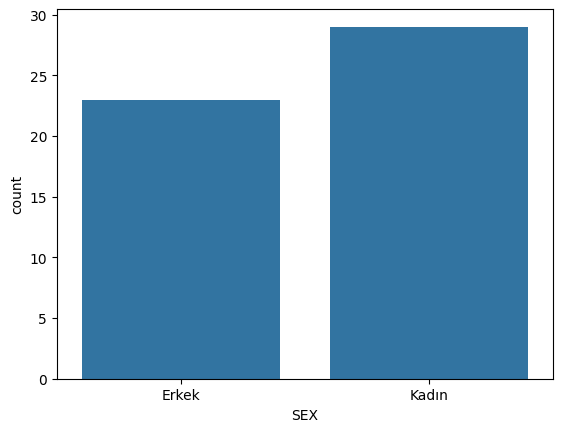

         STUDENT  Ratio
STUDENT                
Evet          34 65.385
Hayır         18 34.615
##########################################


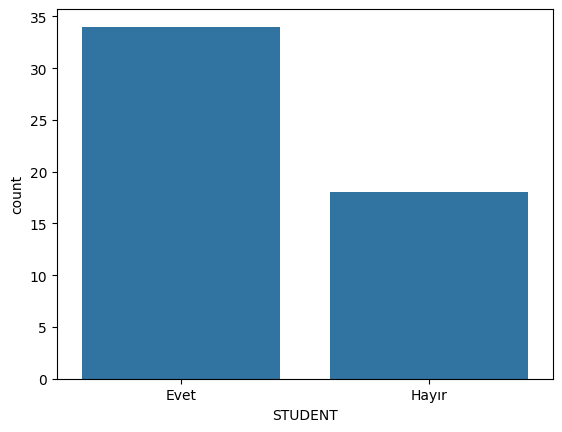

        WORKER  Ratio
WORKER               
Hayır       36 69.231
Evet        16 30.769
##########################################


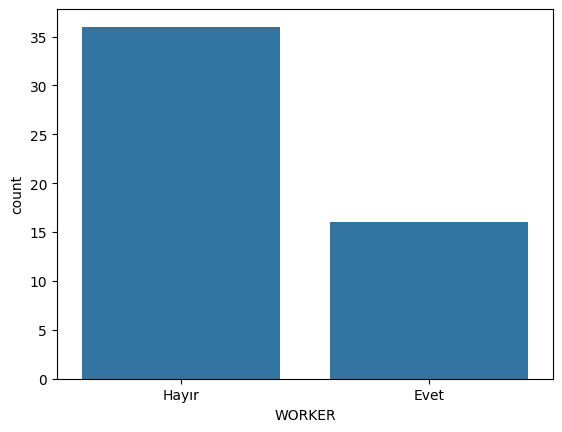

                              TIMEFRAME  Ratio
TIMEFRAME                                     
Kısa vadeli(1 yıla kadar)            18 34.615
Uzun vadeli (5 yıl ve üzeri)         17 32.692
Orta vadeli (1-5 yıl)                17 32.692
##########################################


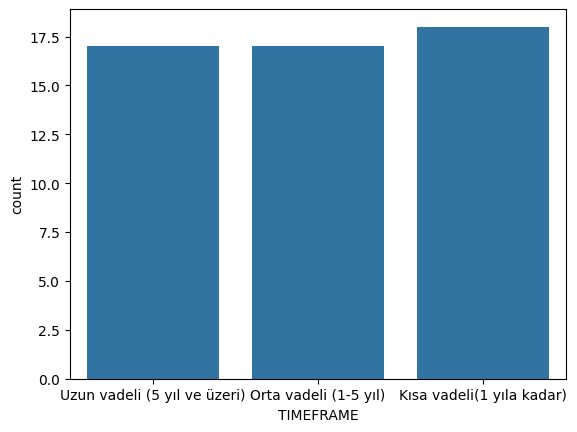

             ASSESSMENT  Ratio
ASSESSMENT                    
Altın                28 53.846
Borsa                12 23.077
Gayrimenkul           7 13.462
Döviz                 5  9.615
##########################################


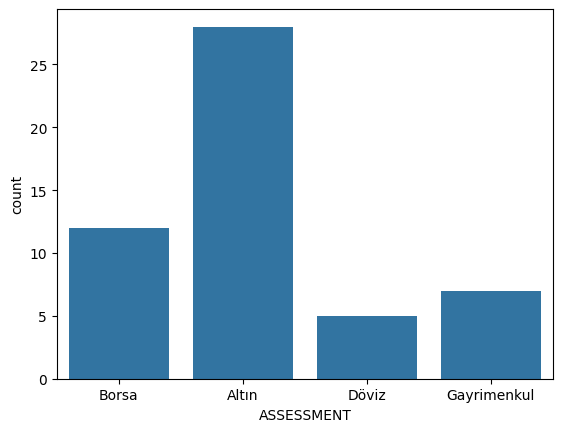

          INVESTED  Ratio
INVESTED                 
Hayır           36 69.231
Evet            16 30.769
##########################################


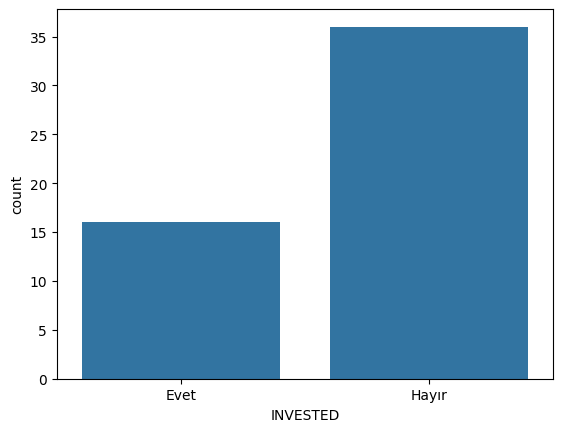

           KNOWLEDGE  Ratio
KNOWLEDGE                  
Az                38 73.077
Orta              12 23.077
Çok iyi            2  3.846
##########################################


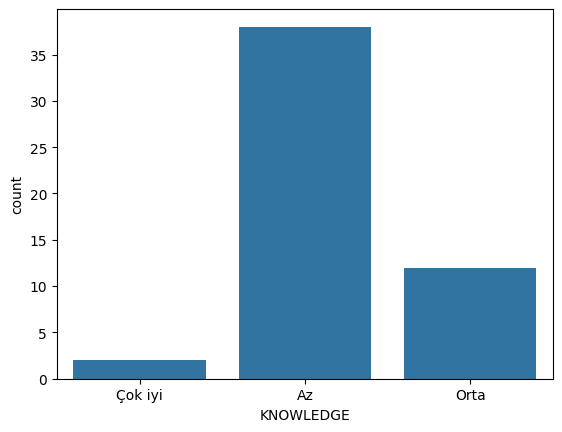

                                       MANAGEMENT  Ratio
MANAGEMENT                                              
Araştırarak temkinli ilerlerim.                27 51.923
Mevcut varlığımın azalmasını istemem.          19 36.538
Aktif alım satım severim.                       6 11.538
##########################################


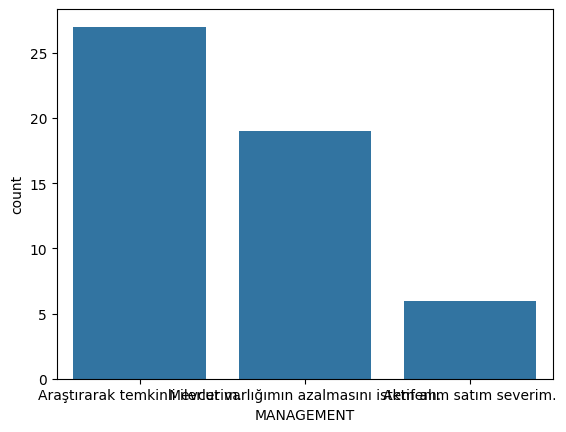

                                  ADVICE_ACTION  Ratio
ADVICE_ACTION                                         
İyice araştırmadan karar vermem.             45 86.538
Genelde uzak dururum.                         6 11.538
Hemen harekete geçerim.                       1  1.923
##########################################


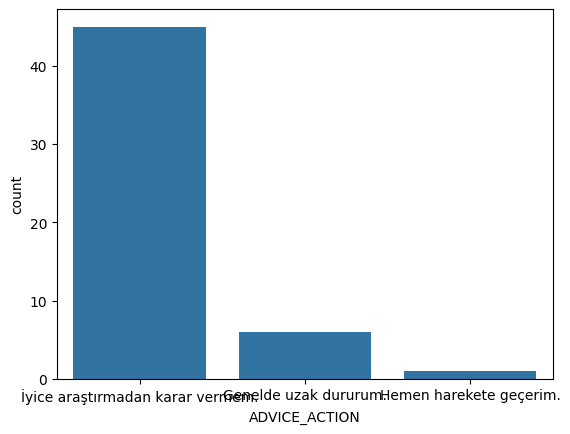

                                 MARKET_REACTION  Ratio
MARKET_REACTION                                        
Gidişata göre karar veririm.                  47 90.385
Fırsat görür, almayı düşünürüm.                4  7.692
Streslenir,satmayı düşünürüm.                  1  1.923
##########################################


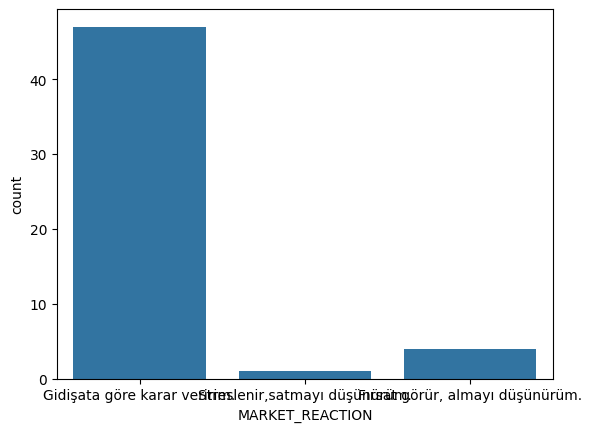

                                                    RISK_RETURN  Ratio
RISK_RETURN                                                           
Riskten kaçınır, makul getiri sağlamayı tercih ...           33 63.462
Uzun vadede getirim için riskli ürünlere yatırı...           10 19.231
Mevduat faizi üzerinde getiri beklentisiyle düş...            6 11.538
Yüksek getiri beklentisiyle, yüksek riskli ürün...            3  5.769
##########################################


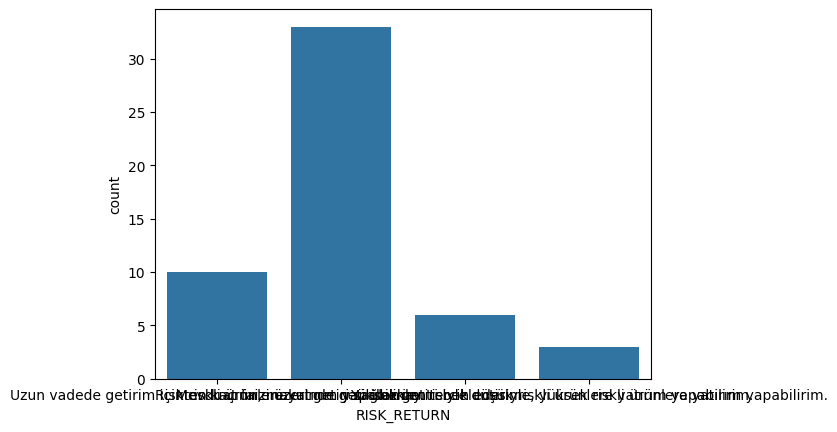

                     PAST_LOSS_ACTION  Ratio
PAST_LOSS_ACTION                            
Yatırımı yapardım.                 26 50.000
Yatırımı yapmazdım.                26 50.000
##########################################


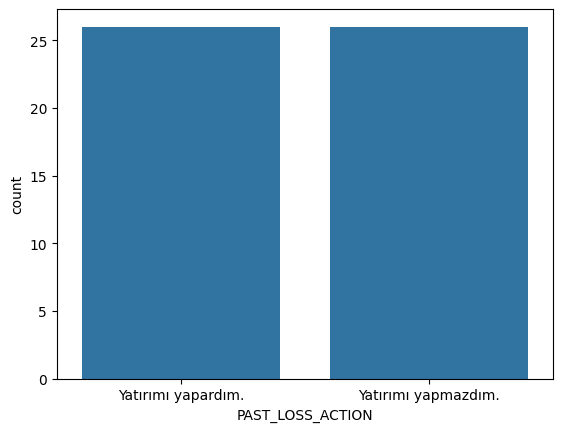

In [ ]:
for col in cat_cols:
  cat_summary(df, col,plot=True)

In [ ]:
# Numerik Değişkenlerin Analizi

def num_summary(dataframe, numerical_col, plot=False):
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[numerical_col].describe(quantiles).T)


  if plot:
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.title(numerical_col)
    plt.show()

count   52.000
mean    27.635
std     10.825
min     17.000
5%      18.550
10%     19.000
20%     20.000
30%     20.000
40%     20.000
50%     21.000
60%     23.000
70%     34.400
80%     40.400
90%     45.800
95%     47.450
99%     49.960
max     52.000
Name: AGE, dtype: float64


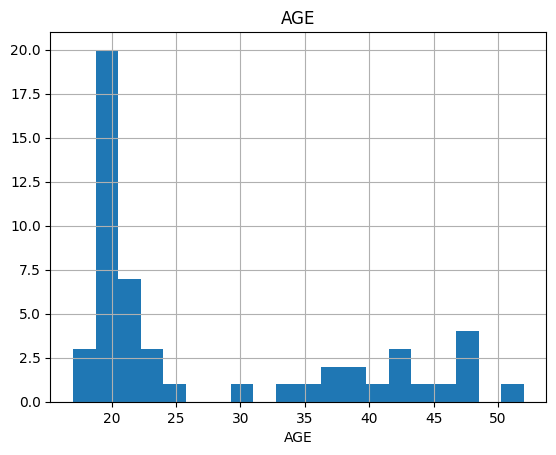

In [ ]:
for col in num_cols:
  num_summary(df, col, plot=True)

In [ ]:
# Eksik Değer Analizi
df.isnull().sum()

,0
AGE,0
SEX,0
STUDENT,0
WORKER,0
TIMEFRAME,0
ASSESSMENT,0
INVESTED,0
KNOWLEDGE,0
MANAGEMENT,0
ADVICE_ACTION,0


In [ ]:
# Label Encoding

def label_encoder(dataframe, binary_col):
  labelencoder = LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe

In [ ]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
print(binary_cols)

['SEX', 'STUDENT', 'WORKER', 'INVESTED', 'PAST_LOSS_ACTION']


In [ ]:
for col in binary_cols:
  df = label_encoder(df, col)

In [ ]:
df.head()

,AGE,SEX,STUDENT,WORKER,TIMEFRAME,ASSESSMENT,INVESTED,KNOWLEDGE,MANAGEMENT,ADVICE_ACTION,MARKET_REACTION,RISK_RETURN,PAST_LOSS_ACTION
0,21,0,0,1,Uzun vadeli (5 yıl ve üzeri),Borsa,0,Çok iyi,Araştırarak temkinli ilerlerim.,İyice araştırmadan karar vermem.,Gidişata göre karar veririm.,Uzun vadede getirim için riskli ürünlere yatır...,0
1,20,1,0,1,Orta vadeli (1-5 yıl),Altın,1,Az,Araştırarak temkinli ilerlerim.,İyice araştırmadan karar vermem.,Gidişata göre karar veririm.,Uzun vadede getirim için riskli ürünlere yatır...,0
2,20,1,0,1,Kısa vadeli(1 yıla kadar),Döviz,1,Az,Mevcut varlığımın azalmasını istemem.,İyice araştırmadan karar vermem.,Gidişata göre karar veririm.,"Riskten kaçınır, makul getiri sağlamayı tercih...",1
3,20,1,0,1,Orta vadeli (1-5 yıl),Altın,1,Az,Araştırarak temkinli ilerlerim.,İyice araştırmadan karar vermem.,Gidişata göre karar veririm.,Mevduat faizi üzerinde getiri beklentisiyle dü...,0
4,18,1,0,1,Orta vadeli (1-5 yıl),Döviz,1,Orta,Aktif alım satım severim.,İyice araştırmadan karar vermem.,Gidişata göre karar veririm.,"Riskten kaçınır, makul getiri sağlamayı tercih...",1


In [ ]:
# Uzun vadeli sütunu oluşturma
df['UZUN_VADE'] = df["TIMEFRAME"].apply(lambda x: 1 if 'Uzun vadeli (5 yıl ve üzeri)' in x else 0)

# Orta vadeli sütunu oluşturma
df['ORTA_VADE'] = df["TIMEFRAME"].apply(lambda x: 1 if 'Orta vadeli (1-5 yıl)' in x else 0)

# Kısa vadeli sütunu oluşturma
df['KISA_VADE'] = df["TIMEFRAME"].apply(lambda x: 1 if 'Kısa vadeli(1 yıla kadar)' in x else 0)

In [ ]:
df['GAYRIMENKUL'] = df["ASSESSMENT"].apply(lambda x: 1 if 'Gayrimenkul' in x else 0)

# Altın sütunu
df['ALTIN'] = df["ASSESSMENT"].apply(lambda x: 1 if 'Altın' in x else 0)

# Döviz sütunu
df['DOVIZ'] = df["ASSESSMENT"].apply(lambda x: 1 if 'Döviz' in x else 0)

# Mevduat sütunu
df['MEVDUAT'] = df["ASSESSMENT"].apply(lambda x: 1 if 'Mevduat' in x else 0)

# Borsa sütunu
df['BORSA'] = df["ASSESSMENT"].apply(lambda x: 1 if 'Borsa' in x else 0)

In [ ]:
# Çok iyi bilgi seviyesi sütunu oluşturma
df['KNOWLEDGE_COK_IYI'] = df["KNOWLEDGE"].apply(lambda x: 1 if 'Çok iyi' in x else 0)

# Orta bilgi seviyesi sütunu oluşturma
df['KNOWLEDGE_ORTA'] = df["KNOWLEDGE"].apply(lambda x: 1 if 'Orta' in x else 0)

# Az bilgi seviyesi sütunu oluşturma
df['KNOWLEDGE_AZ'] = df["KNOWLEDGE"].apply(lambda x: 1 if 'Az' in x else 0)

In [ ]:
# Araştırarak temkinli ilerlerim sütunu oluşturma
df['MANAGEMENT_TEMKINLI'] = df["MANAGEMENT"].apply(lambda x: 1 if 'Araştırarak temkinli ilerlerim' in x else 0)

# Aktif alım satım severim sütunu oluşturma
df['MANAGEMENT_AKTIF'] = df["MANAGEMENT"].apply(lambda x: 1 if 'Aktif alım satım severim' in x else 0)

# Mevcut varlığımın azalmasını istemem sütunu oluşturma
df['MANAGEMENT_VARLIK_KORUMA'] = df["MANAGEMENT"].apply(lambda x: 1 if 'Mevcut varlığımın azalmasını istemem' in x else 0)

# Kendi stratejilerime göre hareket ederim sütunu oluşturma
df['MANAGEMENT_STRATEJI'] = df["MANAGEMENT"].apply(lambda x: 1 if 'Kendi stratejilerime göre hareket ederim' in x else 0)

In [ ]:
# Genelde uzak dururum sütunu oluşturma
df['ADVICE_ACTION_UZAK'] = df["ADVICE_ACTION"].apply(lambda x: 1 if 'Genelde uzak dururum.' in x else 0)

# Hemen harekete geçerim sütunu oluşturma
df['ADVICE_ACTION_HAREKET'] = df["ADVICE_ACTION"].apply(lambda x: 1 if 'Hemen harekete geçerim.' in x else 0)

# İyice araştırmadan karar vermem sütunu oluşturma
df['ADVICE_ACTION_ARASTİR'] = df["ADVICE_ACTION"].apply(lambda x: 1 if 'İyice araştırmadan karar vermem.' in x else 0)

In [ ]:
# Streslenir, satmayı düşünürüm sütunu oluşturma
df['MARKET_REACTION_STRES'] = df["MARKET_REACTION"].apply(lambda x: 1 if 'Streslenir,satmayı düşünürüm.' in x else 0)

# Fırsat görür, almayı düşünürüm sütunu oluşturma
df['MARKET_REACTION_FIRSAT'] = df["MARKET_REACTION"].apply(lambda x: 1 if 'Fırsat görür, almayı düşünürüm.' in x else 0)

# Gidişata göre karar veririm sütunu oluşturma
df['MARKET_REACTION_GIDISAT'] = df["MARKET_REACTION"].apply(lambda x: 1 if 'Gidişata göre karar veririm.' in x else 0)

In [ ]:
# Riskten kaçınır, makul getiri sağlamayı tercih ederim sütunu oluşturma
df['RISK_RETURN_MAKUL'] = df["RISK_RETURN"].apply(lambda x: 1 if 'Riskten kaçınır, makul getiri sağlamayı tercih ederim.' in x else 0)

# Mevduat faizi üzerinde getiri beklentisiyle düşük riskli ürünlere yatırım yapabilirim sütunu oluşturma
df['RISK_RETURN_DUSUK_RISK'] = df["RISK_RETURN"].apply(lambda x: 1 if 'Mevduat faizi üzerinde getiri beklentisiyle düşük riskli ürünlere yatırım yapabilirim.' in x else 0)

# Uzun vadede getirim için riskli ürünlere yatırım yapabilirim sütunu oluşturma
df['RISK_RETURN_RISKLI'] = df["RISK_RETURN"].apply(lambda x: 1 if 'Uzun vadede getirim için riskli ürünlere yatırım yapabilirim.' in x else 0)

# Yüksek getiri beklentisiyle, yüksek riskli ürünlere yatırım yapabilirim sütunu oluşturma
df['RISK_RETURN_YUKSEK_RISK'] = df["RISK_RETURN"].apply(lambda x: 1 if 'Yüksek getiri beklentisiyle, yüksek riskli ürünlere yatırım yapabilirim.' in x else 0)

In [ ]:
# SEX değişkenine bağlı olarak yeni sütunlar oluşturma

# BOYS sütunu: SEX değeri 0 ise 1, diğer durumlarda 0
df['BOYS'] = df['SEX'].apply(lambda x: 1 if x == 0 else 0)

# GIRLS sütunu: SEX değeri 1 ise 1, diğer durumlarda 0
df['GIRLS'] = df['SEX'].apply(lambda x: 1 if x == 1 else 0)

# Sonuç kontrolü
print(df[['SEX', 'BOYS', 'GIRLS']].head())

   SEX  BOYS  GIRLS
0    0     1      0
1    1     0      1
2    1     0      1
3    1     0      1
4    1     0      1


In [ ]:
# Belirtilen sütunları silme
df = df.drop(columns=["TIMEFRAME", "KNOWLEDGE", "MANAGEMENT", "ADVICE_ACTION", "MARKET_REACTION", "RISK_RETURN"])

# Sonuçları kontrol etme
print(df.head())

   AGE  SEX  STUDENT  WORKER ASSESSMENT  INVESTED  PAST_LOSS_ACTION  UZUN_VADE  ORTA_VADE  \
0   21    0        0       1      Borsa         0                 0          1          0   
1   20    1        0       1      Altın         1                 0          0          1   
2   20    1        0       1      Döviz         1                 1          0          0   
3   20    1        0       1      Altın         1                 0          0          1   
4   18    1        0       1      Döviz         1                 1          0          1   

   KISA_VADE  GAYRIMENKUL  ALTIN  DOVIZ  MEVDUAT  BORSA  KNOWLEDGE_COK_IYI  KNOWLEDGE_ORTA  \
0          0            0      0      0        0      1                  1               0   
1          0            0      1      0        0      0                  0               0   
2          1            0      0      1        0      0                  0               0   
3          0            0      1      0        0      0          

In [ ]:
df.drop("ASSESSMENT", axis=1, inplace=True)

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

observations: 52
variables: 33
cat_cols: 32
num_cols: 1
cat_but_car: 0
num_but_cat: 32


In [ ]:
# Öyle bir fonksiyon yazalım ki kendisine girilen değerlerin eşik değerlerini hesaplıyor olsun
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquantile_range = quartile3 - quartile1
  up_limit = quartile3 + 1.5 * interquantile_range
  low_limit = quartile1 - 1.5 * interquantile_range
  return low_limit, up_limit

In [ ]:
# Şimdi aykırı değer var mı yok mu diye bir fonk yazalım

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
def replace_with_thresholds(dataframe, variable):
  low_limit, up_limit = outlier_thresholds(dataframe, variable)
  dataframe.loc[(dataframe[variable] < low_limit) , variable] = low_limit   # Alt aykırı değer varsa low_limit ' e eşitle
  dataframe.loc[(dataframe[variable] > up_limit) , variable] = up_limit     # Üst aykırı değer varsa up_limit ' e eşitle

In [ ]:
# Aykırı Değer Analizi ve Baskılama İşlemi

for col in df.columns:
  print(col, check_outlier(df, col))
  if check_outlier(df, col):
    replace_with_thresholds(df, col)

AGE False
SEX False
STUDENT False
WORKER False
INVESTED False
PAST_LOSS_ACTION False
UZUN_VADE False
ORTA_VADE False
KISA_VADE False
GAYRIMENKUL True
ALTIN False
DOVIZ True
MEVDUAT False
BORSA True
KNOWLEDGE_COK_IYI True
KNOWLEDGE_ORTA True
KNOWLEDGE_AZ False
MANAGEMENT_TEMKINLI False
MANAGEMENT_AKTIF True
MANAGEMENT_VARLIK_KORUMA False
MANAGEMENT_STRATEJI False
ADVICE_ACTION_UZAK True
ADVICE_ACTION_HAREKET True
ADVICE_ACTION_ARASTİR True
MARKET_REACTION_STRES True
MARKET_REACTION_FIRSAT True
MARKET_REACTION_GIDISAT True
RISK_RETURN_MAKUL False
RISK_RETURN_DUSUK_RISK True
RISK_RETURN_RISKLI True
RISK_RETURN_YUKSEK_RISK True
BOYS False
GIRLS False


In [ ]:
for col in df.columns:
  print(col, check_outlier(df, col))

AGE False
SEX False
STUDENT False
WORKER False
INVESTED False
PAST_LOSS_ACTION False
UZUN_VADE False
ORTA_VADE False
KISA_VADE False
GAYRIMENKUL False
ALTIN False
DOVIZ False
MEVDUAT False
BORSA False
KNOWLEDGE_COK_IYI False
KNOWLEDGE_ORTA False
KNOWLEDGE_AZ False
MANAGEMENT_TEMKINLI False
MANAGEMENT_AKTIF False
MANAGEMENT_VARLIK_KORUMA False
MANAGEMENT_STRATEJI False
ADVICE_ACTION_UZAK False
ADVICE_ACTION_HAREKET False
ADVICE_ACTION_ARASTİR False
MARKET_REACTION_STRES False
MARKET_REACTION_FIRSAT False
MARKET_REACTION_GIDISAT False
RISK_RETURN_MAKUL False
RISK_RETURN_DUSUK_RISK False
RISK_RETURN_RISKLI False
RISK_RETURN_YUKSEK_RISK False
BOYS False
GIRLS False


In [ ]:
# Belirtilen sütunlar için 0 -> 1 ve 1 -> 0 dönüşümü
columns_to_invert = ["SEX",'STUDENT', 'WORKER', 'INVESTED', 'PAST_LOSS_ACTION']

# Dönüşümü uygula
df[columns_to_invert] = df[columns_to_invert].apply(lambda x: 1 - x)

# Kontrol et
print(df[columns_to_invert].head())

   SEX  STUDENT  WORKER  INVESTED  PAST_LOSS_ACTION
0    1        1       0         1                 1
1    0        1       0         0                 1
2    0        1       0         0                 0
3    0        1       0         0                 1
4    0        1       0         0                 0


In [ ]:
df.head()

,AGE,SEX,STUDENT,WORKER,INVESTED,PAST_LOSS_ACTION,UZUN_VADE,ORTA_VADE,KISA_VADE,GAYRIMENKUL,ALTIN,DOVIZ,MEVDUAT,BORSA,KNOWLEDGE_COK_IYI,KNOWLEDGE_ORTA,KNOWLEDGE_AZ,MANAGEMENT_TEMKINLI,MANAGEMENT_AKTIF,MANAGEMENT_VARLIK_KORUMA,MANAGEMENT_STRATEJI,ADVICE_ACTION_UZAK,ADVICE_ACTION_HAREKET,ADVICE_ACTION_ARASTİR,MARKET_REACTION_STRES,MARKET_REACTION_FIRSAT,MARKET_REACTION_GIDISAT,RISK_RETURN_MAKUL,RISK_RETURN_DUSUK_RISK,RISK_RETURN_RISKLI,RISK_RETURN_YUKSEK_RISK,BOYS,GIRLS
0,21,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,20,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2,20,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1
3,20,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4,18,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1


In [ ]:
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 25, 40, 60, np.inf], labels=['Genç', 'Orta Yaş', 'Orta Üstü', 'Yaşlı'])

In [ ]:
# AGE sütununu veri çerçevesinden çıkarma
df = df.drop(columns=["AGE"])

# Sonuç kontrolü
print(df.head())


   SEX  STUDENT  WORKER  INVESTED  PAST_LOSS_ACTION  UZUN_VADE  ORTA_VADE  KISA_VADE  GAYRIMENKUL  \
0    1        1       0         1                 1          1          0          0            0   
1    0        1       0         0                 1          0          1          0            0   
2    0        1       0         0                 0          0          0          1            0   
3    0        1       0         0                 1          0          1          0            0   
4    0        1       0         0                 0          0          1          0            0   

   ALTIN  DOVIZ  MEVDUAT  BORSA  KNOWLEDGE_COK_IYI  KNOWLEDGE_ORTA  KNOWLEDGE_AZ  \
0      0      0        0      0                  0               0             0   
1      1      0        0      0                  0               0             1   
2      0      0        0      0                  0               0             1   
3      1      0        0      0                  0       

In [ ]:
df['RISK_KNOWLEDGE_SCORE'] = (df['KNOWLEDGE_COK_IYI'] * 2 +
                              df['KNOWLEDGE_ORTA'] * 1 -
                              df['RISK_RETURN_MAKUL'])

In [ ]:
df['MARKET_REACTION_SCORE'] = (df['MARKET_REACTION_STRES'] * -1 +
                               df['MARKET_REACTION_FIRSAT'] * 1 +
                               df['MARKET_REACTION_GIDISAT'] * 0.5)

In [ ]:
# BOYS ve GIRLS sütunları üzerinden yeni feature'lar üretme

# 1. Erkeklerin (BOYS) kısa vadeli ve temkinli yönetim tercihi
df['BOYS_KISA_TEMKINLI'] = df['BOYS'] + df['KISA_VADE'] + df['MANAGEMENT_TEMKINLI']

# 2. Kadınların (GIRLS) orta vadeli ve düşük riskli tercihleri
df['GIRLS_ORTA_DUSUK_RISK'] = df['GIRLS'] + df['ORTA_VADE'] + df['RISK_RETURN_DUSUK_RISK']

# 3. Erkeklerin uzun vadeli ve yüksek riskli tercihi
df['BOYS_UZUN_YUKSEK_RISK'] = df['BOYS'] + df['UZUN_VADE'] + df['RISK_RETURN_YUKSEK_RISK']

# 4. Kadınların bilgi seviyesi ve temkinli yönetimi
df['GIRLS_BILGI_TEMKINLI'] = df['GIRLS'] + df['KNOWLEDGE_AZ'] + df['MANAGEMENT_TEMKINLI']

# 5. Ağırlıklı risk skoru (BOYS ve GIRLS'ın etkisi dahil)
df['RISK_SCORE_BOYS_GIRLS'] = (
    df['BOYS'] * 0.3 +
    df['GIRLS'] * 0.3 +
    df['RISK_RETURN_MAKUL'] * 0.2 +
    df['MANAGEMENT_TEMKINLI'] * 0.2
)

# 6. Erkeklerin (BOYS) ve Kadınların (GIRLS) piyasa tepkisi kombinasyonu
df['BOYS_MARKET_FIRSAT'] = df['BOYS'] + df['MARKET_REACTION_FIRSAT']
df['GIRLS_MARKET_STRES'] = df['GIRLS'] + df['MARKET_REACTION_STRES']

# 7. BOYS ve GIRLS için toplam yönetim skoru
df['BOYS_MANAGEMENT_SCORE'] = df['BOYS'] + (df['MANAGEMENT_TEMKINLI'] + df['MANAGEMENT_STRATEJI'])
df['GIRLS_MANAGEMENT_SCORE'] = df['GIRLS'] + (df['MANAGEMENT_TEMKINLI'] + df['MANAGEMENT_STRATEJI'])

# Sonuç kontrolü
print(df[[
    'BOYS_KISA_TEMKINLI', 'GIRLS_ORTA_DUSUK_RISK', 'BOYS_UZUN_YUKSEK_RISK',
    'GIRLS_BILGI_TEMKINLI', 'RISK_SCORE_BOYS_GIRLS', 'BOYS_MARKET_FIRSAT',
    'GIRLS_MARKET_STRES', 'BOYS_MANAGEMENT_SCORE', 'GIRLS_MANAGEMENT_SCORE'
]].head())


   BOYS_KISA_TEMKINLI  GIRLS_ORTA_DUSUK_RISK  BOYS_UZUN_YUKSEK_RISK  GIRLS_BILGI_TEMKINLI  \
0                   2                      0                      2                     1   
1                   1                      2                      0                     3   
2                   1                      1                      0                     2   
3                   1                      2                      0                     3   
4                   0                      2                      0                     1   

   RISK_SCORE_BOYS_GIRLS  BOYS_MARKET_FIRSAT  GIRLS_MARKET_STRES  BOYS_MANAGEMENT_SCORE  \
0                  0.500                   1                   0                      2   
1                  0.500                   0                   1                      1   
2                  0.500                   0                   1                      0   
3                  0.500                   0                   1             

In [ ]:
df['MANAGEMENT_RISK_SCORE'] = (df['MANAGEMENT_TEMKINLI'] * -1 +
                               df['MANAGEMENT_AKTIF'] * 1 +
                               df['RISK_RETURN_YUKSEK_RISK'] * 2)


In [ ]:
df['LONG_TERM_INVESTMENT'] = df['UZUN_VADE'] + df['MANAGEMENT_TEMKINLI']


In [ ]:
# Label Encoding
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [ ]:
df.head()

,SEX,STUDENT,WORKER,INVESTED,PAST_LOSS_ACTION,UZUN_VADE,ORTA_VADE,KISA_VADE,GAYRIMENKUL,ALTIN,DOVIZ,MEVDUAT,BORSA,KNOWLEDGE_COK_IYI,KNOWLEDGE_ORTA,KNOWLEDGE_AZ,MANAGEMENT_TEMKINLI,MANAGEMENT_AKTIF,MANAGEMENT_VARLIK_KORUMA,MANAGEMENT_STRATEJI,ADVICE_ACTION_UZAK,ADVICE_ACTION_HAREKET,ADVICE_ACTION_ARASTİR,MARKET_REACTION_STRES,MARKET_REACTION_FIRSAT,MARKET_REACTION_GIDISAT,RISK_RETURN_MAKUL,RISK_RETURN_DUSUK_RISK,RISK_RETURN_RISKLI,RISK_RETURN_YUKSEK_RISK,BOYS,GIRLS,AGE_GROUP,RISK_KNOWLEDGE_SCORE,MARKET_REACTION_SCORE,BOYS_KISA_TEMKINLI,GIRLS_ORTA_DUSUK_RISK,BOYS_UZUN_YUKSEK_RISK,GIRLS_BILGI_TEMKINLI,RISK_SCORE_BOYS_GIRLS,BOYS_MARKET_FIRSAT,GIRLS_MARKET_STRES,BOYS_MANAGEMENT_SCORE,GIRLS_MANAGEMENT_SCORE,MANAGEMENT_RISK_SCORE,LONG_TERM_INVESTMENT
0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,Genç,0,0.500,2,0,2,1,0.500,1,0,2,1,-1,2
1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,Genç,0,0.500,1,2,0,3,0.500,0,1,1,2,-1,1
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,Genç,-1,0.500,1,1,0,2,0.500,0,1,0,1,0,0
3,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,Genç,0,0.500,1,2,0,3,0.500,0,1,1,2,-1,1
4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,Genç,-1,0.500,0,2,0,1,0.500,0,1,0,1,0,0


In [ ]:
for col in binary_cols:
  df = label_encoder(df, col)

In [ ]:
# AGE sütununu veri çerçevesinden çıkarma
df = df.drop(columns=["SEX"])

# Sonuç kontrolü
print(df.head())

   STUDENT  WORKER  INVESTED  PAST_LOSS_ACTION  UZUN_VADE  ORTA_VADE  KISA_VADE  GAYRIMENKUL  \
0        1       0         1                 1          1          0          0            0   
1        1       0         0                 1          0          1          0            0   
2        1       0         0                 0          0          0          1            0   
3        1       0         0                 1          0          1          0            0   
4        1       0         0                 0          0          1          0            0   

   ALTIN  DOVIZ  MEVDUAT  BORSA  KNOWLEDGE_COK_IYI  KNOWLEDGE_ORTA  KNOWLEDGE_AZ  \
0      0      0        0      0                  0               0             0   
1      1      0        0      0                  0               0             1   
2      0      0        0      0                  0               0             1   
3      1      0        0      0                  0               0             1   
4  

In [ ]:
df = pd.get_dummies(df, columns=['AGE_GROUP'], drop_first=True)

In [ ]:
df.head()

,STUDENT,WORKER,INVESTED,PAST_LOSS_ACTION,UZUN_VADE,ORTA_VADE,KISA_VADE,GAYRIMENKUL,ALTIN,DOVIZ,MEVDUAT,BORSA,KNOWLEDGE_COK_IYI,KNOWLEDGE_ORTA,KNOWLEDGE_AZ,MANAGEMENT_TEMKINLI,MANAGEMENT_AKTIF,MANAGEMENT_VARLIK_KORUMA,MANAGEMENT_STRATEJI,ADVICE_ACTION_UZAK,ADVICE_ACTION_HAREKET,ADVICE_ACTION_ARASTİR,MARKET_REACTION_STRES,MARKET_REACTION_FIRSAT,MARKET_REACTION_GIDISAT,RISK_RETURN_MAKUL,RISK_RETURN_DUSUK_RISK,RISK_RETURN_RISKLI,RISK_RETURN_YUKSEK_RISK,BOYS,GIRLS,RISK_KNOWLEDGE_SCORE,MARKET_REACTION_SCORE,BOYS_KISA_TEMKINLI,GIRLS_ORTA_DUSUK_RISK,BOYS_UZUN_YUKSEK_RISK,GIRLS_BILGI_TEMKINLI,RISK_SCORE_BOYS_GIRLS,BOYS_MARKET_FIRSAT,GIRLS_MARKET_STRES,BOYS_MANAGEMENT_SCORE,GIRLS_MANAGEMENT_SCORE,MANAGEMENT_RISK_SCORE,LONG_TERM_INVESTMENT,AGE_GROUP_Orta Yaş,AGE_GROUP_Orta Üstü,AGE_GROUP_Yaşlı
0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0.500,2,0,2,1,0.500,1,0,2,1,-1,2,False,False,False
1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0.500,1,2,0,3,0.500,0,1,1,2,-1,1,False,False,False
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,-1,0.500,1,1,0,2,0.500,0,1,0,1,0,0,False,False,False
3,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0.500,1,2,0,3,0.500,0,1,1,2,-1,1,False,False,False
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,-1,0.500,0,2,0,1,0.500,0,1,0,1,0,0,False,False,False


In [ ]:
# AGE_GROUP sütunlarını int tipine dönüştürmek (True -> 1, False -> 0)
age_group_columns = ['AGE_GROUP_Orta Yaş', 'AGE_GROUP_Orta Üstü', 'AGE_GROUP_Yaşlı']
df[age_group_columns] = df[age_group_columns].astype(int)

In [ ]:
df.head()

,STUDENT,WORKER,INVESTED,PAST_LOSS_ACTION,UZUN_VADE,ORTA_VADE,KISA_VADE,GAYRIMENKUL,ALTIN,DOVIZ,MEVDUAT,BORSA,KNOWLEDGE_COK_IYI,KNOWLEDGE_ORTA,KNOWLEDGE_AZ,MANAGEMENT_TEMKINLI,MANAGEMENT_AKTIF,MANAGEMENT_VARLIK_KORUMA,MANAGEMENT_STRATEJI,ADVICE_ACTION_UZAK,ADVICE_ACTION_HAREKET,ADVICE_ACTION_ARASTİR,MARKET_REACTION_STRES,MARKET_REACTION_FIRSAT,MARKET_REACTION_GIDISAT,RISK_RETURN_MAKUL,RISK_RETURN_DUSUK_RISK,RISK_RETURN_RISKLI,RISK_RETURN_YUKSEK_RISK,BOYS,GIRLS,RISK_KNOWLEDGE_SCORE,MARKET_REACTION_SCORE,BOYS_KISA_TEMKINLI,GIRLS_ORTA_DUSUK_RISK,BOYS_UZUN_YUKSEK_RISK,GIRLS_BILGI_TEMKINLI,RISK_SCORE_BOYS_GIRLS,BOYS_MARKET_FIRSAT,GIRLS_MARKET_STRES,BOYS_MANAGEMENT_SCORE,GIRLS_MANAGEMENT_SCORE,MANAGEMENT_RISK_SCORE,LONG_TERM_INVESTMENT,AGE_GROUP_Orta Yaş,AGE_GROUP_Orta Üstü,AGE_GROUP_Yaşlı
0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0.500,2,0,2,1,0.500,1,0,2,1,-1,2,0,0,0
1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0.500,1,2,0,3,0.500,0,1,1,2,-1,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,-1,0.500,1,1,0,2,0.500,0,1,0,1,0,0,0,0,0
3,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0.500,1,2,0,3,0.500,0,1,1,2,-1,1,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,-1,0.500,0,2,0,1,0.500,0,1,0,1,0,0,0,0,0


In [ ]:
# RISK_SCORE hesaplama: Ağırlıklı toplam yöntemi
df['RISK_SCORE'] = (
    # En çok etkileyen değişkenler
    df['RISK_RETURN_MAKUL'] * 0.25 +
    df['RISK_SCORE_BOYS_GIRLS'] * 0.20 +
    df['BOYS'] * 0.15 +
    df['ALTIN'] * 0.15 +
    df['BOYS_UZUN_YUKSEK_RISK'] * 0.20 +
    df['KISA_VADE'] * 0.15 +
    df['KNOWLEDGE_AZ'] * 0.10 +
    df['BOYS_KISA_TEMKINLI'] * 0.10 +
    # Diğer değişkenler
    df['BOYS'] * 0.05 +
    df['GIRLS'] * 0.05 +
    df['STUDENT'] * 0.02 +
    df['WORKER'] * 0.02 +
    df['INVESTED'] * 0.03 +
    df['PAST_LOSS_ACTION'] * 0.02 +
    # Yatırım Tercihleri
    df['UZUN_VADE'] * 0.06 +
    df['ORTA_VADE'] * 0.05 +
    df['GAYRIMENKUL'] * 0.03 +
    df['DOVIZ'] * 0.03 +
    df['MEVDUAT'] * 0.03 +
    df['BORSA'] * 0.04 +
    # Bilgi Seviyesi
    df['KNOWLEDGE_COK_IYI'] * 0.05 +
    df['KNOWLEDGE_ORTA'] * 0.03 +
    # Yönetim Stratejileri
    df['MANAGEMENT_TEMKINLI'] * 0.05 +
    df['MANAGEMENT_AKTIF'] * 0.04 +
    df['MANAGEMENT_VARLIK_KORUMA'] * 0.04 +
    df['MANAGEMENT_STRATEJI'] * 0.04 +
    # Piyasa Tepkileri
    df['MARKET_REACTION_STRES'] * -0.04 +
    df['MARKET_REACTION_FIRSAT'] * 0.05 +
    df['MARKET_REACTION_GIDISAT'] * 0.03 +
    # Risk Tercihleri
    df['RISK_RETURN_DUSUK_RISK'] * 0.04 +
    df['RISK_RETURN_RISKLI'] * 0.04 +
    df['RISK_RETURN_YUKSEK_RISK'] * 0.05 +
    # Yeni Feature'lar
    df['GIRLS_ORTA_DUSUK_RISK'] * 0.03 +
    df['GIRLS_BILGI_TEMKINLI'] * 0.02 +
    df['BOYS_MARKET_FIRSAT'] * 0.03 +
    df['GIRLS_MARKET_STRES'] * -0.03 +
    df['BOYS_MANAGEMENT_SCORE'] * 0.04 +
    df['GIRLS_MANAGEMENT_SCORE'] * 0.04 +
    df['MANAGEMENT_RISK_SCORE'] * 0.05 +
    df['LONG_TERM_INVESTMENT'] * 0.04 +
    # Yaş Grupları
    df['AGE_GROUP_Orta Yaş'] * 0.02 +
    df['AGE_GROUP_Orta Üstü'] * 0.03 +
    df['AGE_GROUP_Yaşlı'] * 0.01
)

# Sonuç kontrolü
print(df[['RISK_SCORE']].head())



   RISK_SCORE
0       1.310
1       0.870
2       0.920
3       0.870
4       0.590


In [ ]:
# Genel olarak bir veri setimize bakalım
def check_df(dataframe, head=5):
  print("##################### Shape ##################### ")
  print(dataframe.shape)
  print("##################### Types ##################### ")
  print(dataframe.dtypes)
  print("##################### Head ##################### ")
  print(dataframe.head(head))
  print("##################### Tail ##################### ")
  print(dataframe.tail(head))
  print("##################### NA ##################### ")
  print(dataframe.isnull().sum())
  print("###################### Quanties ###################### ")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
check_df(df)

##################### Shape ##################### 
(52, 48)
##################### Types ##################### 
STUDENT                   int64
WORKER                    int64
INVESTED                  int64
PAST_LOSS_ACTION          int64
UZUN_VADE                 int64
                         ...   
LONG_TERM_INVESTMENT      int64
AGE_GROUP_Orta Yaş        int64
AGE_GROUP_Orta Üstü       int64
AGE_GROUP_Yaşlı           int64
RISK_SCORE              float64
Length: 48, dtype: object
##################### Head ##################### 
   STUDENT  WORKER  INVESTED  PAST_LOSS_ACTION  UZUN_VADE  ORTA_VADE  KISA_VADE  GAYRIMENKUL  \
0        1       0         1                 1          1          0          0            0   
1        1       0         0                 1          0          1          0            0   
2        1       0         0                 0          0          0          1            0   
3        1       0         0                 1          0          1         

RISK_GROUP Dağılımı:
RISK_GROUP
Orta Risk      24
Yüksek Risk    19
Düşük Risk      9
Name: count, dtype: int64

RISK_SCORE ve RISK_GROUP:
   RISK_SCORE   RISK_GROUP
0       1.310  Yüksek Risk
1       0.870   Düşük Risk
2       0.920    Orta Risk
3       0.870   Düşük Risk
4       0.590   Düşük Risk


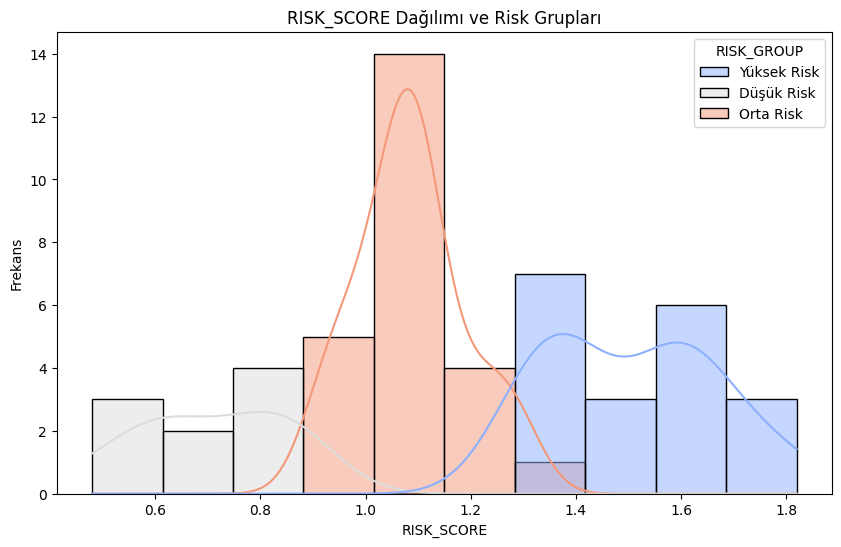

In [ ]:
# RISK_SCORE'u düşük, orta ve yüksek risk kategorilerine ayırma
df["RISK_GROUP"] = pd.cut(
    df["RISK_SCORE"],
    bins=[-float("inf"), 0.90, 1.30, float("inf")],  # Düşük risk için aralık genişletildi
    labels=["Düşük Risk", "Orta Risk", "Yüksek Risk"]
)

# Yeni grupların dağılımını kontrol et
print("RISK_GROUP Dağılımı:")
print(df["RISK_GROUP"].value_counts())

# RISK_SCORE ve RISK_GROUP'u birlikte inceleme
print("\nRISK_SCORE ve RISK_GROUP:")
print(df[["RISK_SCORE", "RISK_GROUP"]].head())

# RISK_GROUP'u kategorik formata dönüştür
df["RISK_GROUP"] = df["RISK_GROUP"].astype(str)

# RISK_SCORE'u görselleştirme ve risk gruplarına göre renklendirme
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="RISK_SCORE", bins=10, kde=True, hue="RISK_GROUP", palette="coolwarm")
plt.title("RISK_SCORE Dağılımı ve Risk Grupları")
plt.xlabel("RISK_SCORE")
plt.ylabel("Frekans")
plt.show()



In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.model_selection import cross_val_predict
import numpy as np
import pandas as pd

# Hedef değişken ve özellikleri ayırma
X = df.drop(columns=["RISK_GROUP", "RISK_SCORE"])
y = df["RISK_GROUP"]

# Hedef değişkeni Label Encoding ile sayısal değerlere dönüştür
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# SMOTE ve model için Pipeline oluşturma
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=3)),  # SMOTE adımı
    ('xgb', XGBClassifier(
        objective="multi:softmax",   # Çok sınıflı sınıflandırma modeli olduğunu belirtir.
        eval_metric="mlogloss",    # Çok sınıflı log-kayıp metriği kullanılır.
        use_label_encoder=False,
        random_state=42
    ))  # XGBoost model adımı
])

# Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation tahminleri
y_pred = cross_val_predict(pipeline, X, y_encoded, cv=cv)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_encoded, y_pred)
precision = precision_score(y_encoded, y_pred, average="weighted")
recall = recall_score(y_encoded, y_pred, average="weighted")
f1 = f1_score(y_encoded, y_pred, average="weighted")
mse = mean_squared_error(y_encoded, y_pred)

# Cross-validation skorları
cv_scores = cross_val_score(pipeline, X, y_encoded, cv=cv, scoring=make_scorer(accuracy_score))

# Sonuçları yazdırma
print("\nPerformans Metrikleri:")
print(f"Accuracy Score: {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

print("\nCross-Validation Scores:", cv_scores)
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")




Performans Metrikleri:
Accuracy Score: 0.8269
Precision Score: 0.8301
Recall Score: 0.8269
F1 Score: 0.8224
Mean Squared Error (MSE): 0.1731

Cross-Validation Scores: [0.72727273 0.81818182 0.8        0.9        0.9       ]
Mean Cross-Validation Accuracy: 0.8291


In [ ]:
df.head()

,STUDENT,WORKER,INVESTED,PAST_LOSS_ACTION,UZUN_VADE,ORTA_VADE,KISA_VADE,GAYRIMENKUL,ALTIN,DOVIZ,MEVDUAT,BORSA,KNOWLEDGE_COK_IYI,KNOWLEDGE_ORTA,KNOWLEDGE_AZ,MANAGEMENT_TEMKINLI,MANAGEMENT_AKTIF,MANAGEMENT_VARLIK_KORUMA,MANAGEMENT_STRATEJI,ADVICE_ACTION_UZAK,ADVICE_ACTION_HAREKET,ADVICE_ACTION_ARASTİR,MARKET_REACTION_STRES,MARKET_REACTION_FIRSAT,MARKET_REACTION_GIDISAT,RISK_RETURN_MAKUL,RISK_RETURN_DUSUK_RISK,RISK_RETURN_RISKLI,RISK_RETURN_YUKSEK_RISK,BOYS,GIRLS,RISK_KNOWLEDGE_SCORE,MARKET_REACTION_SCORE,BOYS_KISA_TEMKINLI,GIRLS_ORTA_DUSUK_RISK,BOYS_UZUN_YUKSEK_RISK,GIRLS_BILGI_TEMKINLI,RISK_SCORE_BOYS_GIRLS,BOYS_MARKET_FIRSAT,GIRLS_MARKET_STRES,BOYS_MANAGEMENT_SCORE,GIRLS_MANAGEMENT_SCORE,MANAGEMENT_RISK_SCORE,LONG_TERM_INVESTMENT,AGE_GROUP_Orta Yaş,AGE_GROUP_Orta Üstü,AGE_GROUP_Yaşlı,RISK_SCORE,RISK_GROUP
0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0.500,2,0,2,1,0.500,1,0,2,1,-1,2,0,0,0,1.310,Yüksek Risk
1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0.500,1,2,0,3,0.500,0,1,1,2,-1,1,0,0,0,0.870,Düşük Risk
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,-1,0.500,1,1,0,2,0.500,0,1,0,1,0,0,0,0,0,0.920,Orta Risk
3,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0.500,1,2,0,3,0.500,0,1,1,2,-1,1,0,0,0,0.870,Düşük Risk
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,-1,0.500,0,2,0,1,0.500,0,1,0,1,0,0,0,0,0,0.590,Düşük Risk


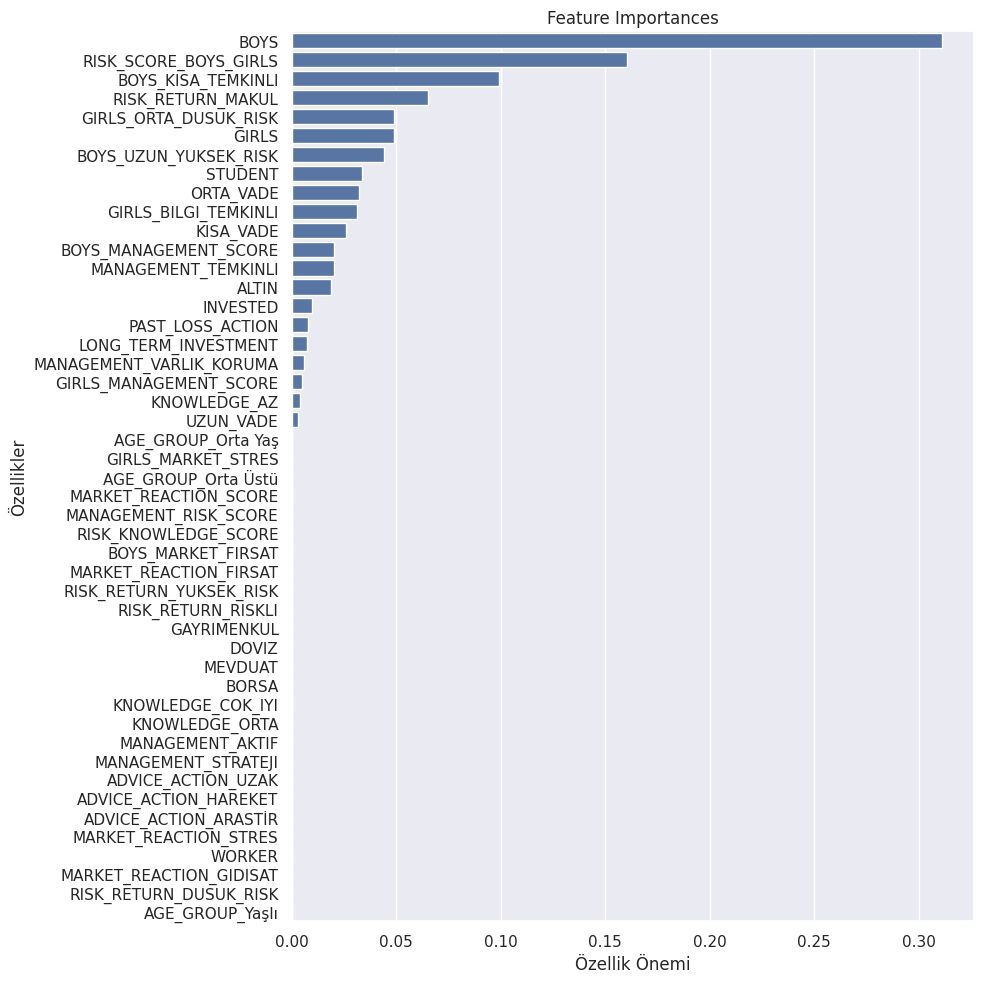

In [ ]:
# XGBoost modelini bağımsız olarak fit etme
xgb_model = XGBClassifier(
    objective="multi:softmax",  # Çok sınıflı sınıflandırma
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42
)

# SMOTE ile yeniden örnekleme yapma
smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Modeli eğitme
xgb_model.fit(X_resampled, y_resampled)

# Özellik önem derecelerini görselleştirme
feature_importances = pd.DataFrame({
    "Value": xgb_model.feature_importances_,
    "Feature": X.columns
})

# Barplot ile görselleştirme
plt.figure(figsize=(10, 10))
sns.set(font_scale=1)
sns.barplot(x="Value", y="Feature", data=feature_importances.sort_values(by="Value", ascending=False))
plt.title("Feature Importances")
plt.xlabel("Özellik Önemi")
plt.ylabel("Özellikler")
plt.tight_layout()
plt.show()



In [ ]:
# Gerekli kütüphaneler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# 1. Hiperparametre optimizasyonu için GridSearch parametreleri
grid_params = {
    'xgb__n_estimators': [50, 100, 200],      # Ağaç sayısı
    'xgb__max_depth': [3, 5, 7],             # Maksimum derinlik
    'xgb__learning_rate': [0.01, 0.1, 0.2],  # Öğrenme oranı
    'xgb__subsample': [0.8, 1.0],            # Alt örnekleme oranı
    'xgb__colsample_bytree': [0.8, 1.0],     # Özellik alt örnekleme oranı
    'xgb__gamma': [0, 1, 5]                  # Dallanma gereksinimi için minimum kayıp azaltımı
}

# 2. Pipeline oluşturma: SMOTE + XGBoost
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # SMOTE: Sınıflar dengeleniyor
    ('xgb', XGBClassifier(
        objective="multi:softprob",      # Çok sınıflı sınıflandırma
        eval_metric="mlogloss",         # Çok sınıflı logaritmik kayıp
        use_label_encoder=False,        # XGBoost'un etiket kodlama uyarısını kapatma
        random_state=42                 # Rastgelelik kontrolü
    ))
])

from collections import Counter
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y_encoded)   # Smote sonrası sınıf dağılımı
print("SMOTE sonrası sınıf dağılımı:", Counter(y_resampled))


# 3. Stratified K-Fold Cross-Validation tanımlama
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. GridSearchCV ile hiperparametre optimizasyonu
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=grid_params,
    scoring='f1_weighted',  # Performansı ölçmek için ağırlıklı F1 skoru kullanılıyor
    cv=cv,
    verbose=1,
    n_jobs=-1               # Tüm işlemcileri kullanarak paralel çalıştırma
)

# 5. GridSearchCV eğitimi
grid_search.fit(X, y_encoded)

# 6. En iyi hiperparametreler ve çapraz doğrulama sonucu
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score (Cross-Validation):", grid_search.best_score_)

# 7. En iyi modelin tahminlerini alma
best_model = grid_search.best_estimator_
y_pred = cross_val_predict(best_model, X, y_encoded, cv=cv)

# 8. Performans metriklerini hesaplama
accuracy = accuracy_score(y_encoded, y_pred)
f1 = f1_score(y_encoded, y_pred, average="weighted")
roc_auc = roc_auc_score(pd.get_dummies(y_encoded), pd.get_dummies(y_pred), multi_class="ovr")
classification_rep = classification_report(y_encoded, y_pred)

# 9. Performans sonuçlarını yazdırma
print("\nPerformans Metrikleri:")
print(f"Accuracy Score (Cross-Validation): {accuracy:.4f}")
print(f"F1 Score (Cross-Validation): {f1:.4f}")
print(f"ROC-AUC Score (Cross-Validation): {roc_auc:.4f}")
print("\nClassification Report (Cross-Validation):")
print(classification_rep)

# 10. Yorum:
# - Model, SMOTE ile dengelenmiş verilere göre çalışıyor.
# - Çapraz doğrulama (cross-validation) ile aşırı öğrenme (overfitting) riski minimize edilmiş durumda.
# - GridSearch ile optimum hiperparametreler seçildi.


SMOTE sonrası sınıf dağılımı: Counter({2: 24, 0: 24, 1: 24})
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'xgb__colsample_bytree': 0.8, 'xgb__gamma': 0, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 7, 'xgb__n_estimators': 100, 'xgb__subsample': 1.0}
Best F1 Score (Cross-Validation): 0.8226850321395774

Performans Metrikleri:
Accuracy Score (Cross-Validation): 0.8269
F1 Score (Cross-Validation): 0.8240
ROC-AUC Score (Cross-Validation): 0.8390

Classification Report (Cross-Validation):
              precision    recall  f1-score   support

           0       0.71      0.56      0.62         9
           1       0.78      0.88      0.82        24
           2       0.94      0.89      0.92        19

    accuracy                           0.83        52
   macro avg       0.81      0.78      0.79        52
weighted avg       0.83      0.83      0.82        52



In [ ]:
def yatırım_önerisi(row):
    """
    Kullanıcının risk seviyesine göre yatırım önerisi yapan fonksiyon.
    """
    if row["RISK_GROUP"] == "Yüksek Risk":
        return "Coin ve yüksek volatiliteye sahip hisseler."
    elif row["RISK_GROUP"] == "Orta Risk":
        return "BIST30'da düzenli ve istikrarlı hisseler veya hisse senedi fonları."
    elif row["RISK_GROUP"] == "Düşük Risk":
        return "Mevduat veya para piyasası fonları."
    else:
        return "Risk analizi yapılamadı."

# Yatırım önerisi sütunu ekleme
df["YATIRIM_ONERISI"] = df.apply(yatırım_önerisi, axis=1)

# Sonuçları kontrol etme
print(df[["RISK_GROUP", "YATIRIM_ONERISI"]].head())

    RISK_GROUP                                    YATIRIM_ONERISI
0  Yüksek Risk        Coin ve yüksek volatiliteye sahip hisseler.
1   Düşük Risk                Mevduat veya para piyasası fonları.
2    Orta Risk  BIST30'da düzenli ve istikrarlı hisseler veya ...
3   Düşük Risk                Mevduat veya para piyasası fonları.
4   Düşük Risk                Mevduat veya para piyasası fonları.


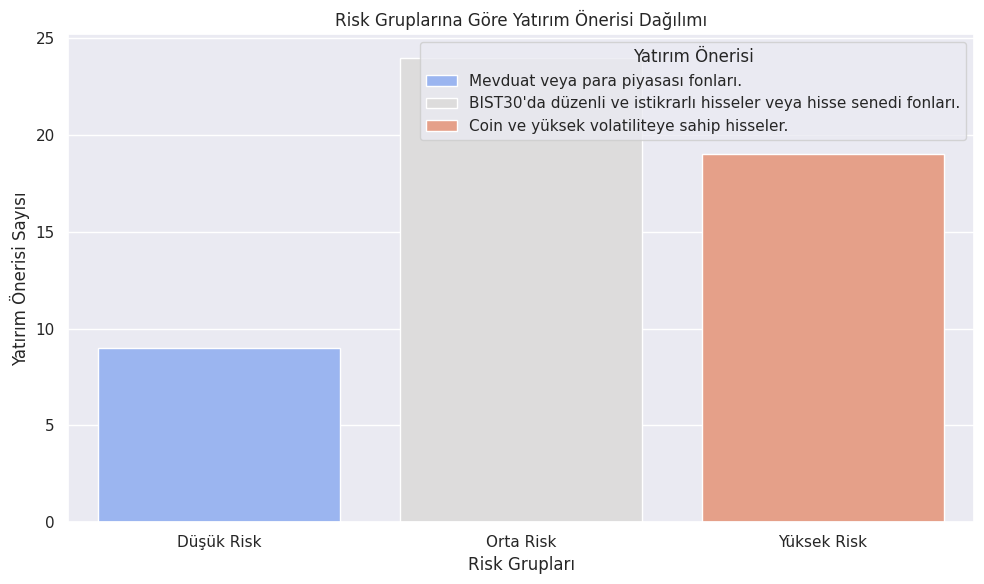

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Yatırım önerilerinin dağılımını görmek için gruplama
yatirim_onerisi_distribution = df.groupby(["RISK_GROUP", "YATIRIM_ONERISI"]).size().reset_index(name="Count")

# Çubuk grafik oluşturma
plt.figure(figsize=(10, 6))
sns.barplot(
    data=yatirim_onerisi_distribution,
    x="RISK_GROUP",
    y="Count",
    hue="YATIRIM_ONERISI",
    palette="coolwarm"
)
plt.title("Risk Gruplarına Göre Yatırım Önerisi Dağılımı")
plt.xlabel("Risk Grupları")
plt.ylabel("Yatırım Önerisi Sayısı")
plt.legend(title="Yatırım Önerisi", loc="upper right")
plt.tight_layout()
plt.show()
